# Course: Social Media Mining
# Paper - 3

## Name: Greeshma Sai Sree Duggireddy

## Performing Social Network Analysis

### The data is extracted from the twitter account - 'womensmarch'

In [1]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install community

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tweepy==3.9.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tweepy
import pandas as pd
import tweepy
from tweepy.api import API

In [5]:
consumer_key = "tPcgghPQArEgKqdmHtzgw40vd"
consumer_secret = "emXmHr46oFc6piot6pp6e9ukKggDyBu7dj1yoVILLYwylzqnbk"
access_token = "863399243209478144-dGTvo8rK9rTb6Abpp5bhP52KeZeheoK"
access_token_secret = "ueuCxMdsZ29kh9Y0e0263GHqoeXguuHzpcggJMVPgElR6"

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
me = api.get_user(screen_name = 'womensmarch')
me.id

800942537083068416

In [8]:
user_list = ["800942537083068416"]
friends_list = []
for user in user_list:
    friends = []
    try:
        for page in tweepy.Cursor(api.friends_ids, user_id=user).pages():
            friends.extend(page)
            print(len(friends))
            if(len(friends)>=5000):
                break
    except tweepy.TweepError:
        print("error")
        continue
    friends_list.append(friends)

856


In [9]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = friends_list[0] #Set the list of followers as the target column
df['source'] = 800942537083068416 #Set my user ID as the source 

In [10]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

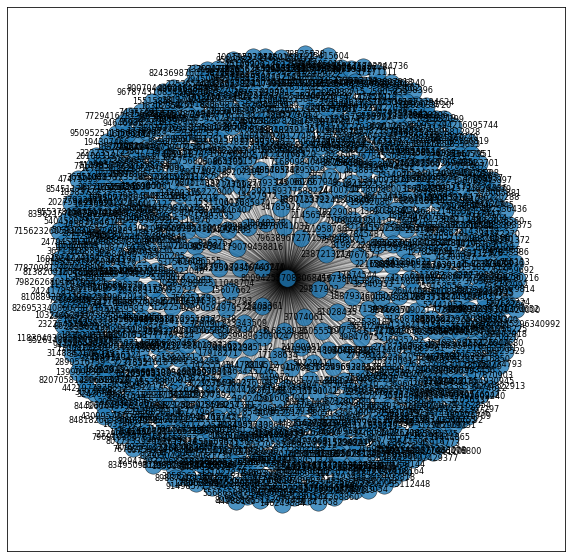

In [11]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [12]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

    # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkData.csv")

1501279216146567169
48
42709390
1835
175222900
5000
738513062802624514
3088
35540353
5000
1455275863637909507
103
1129029661
5000
908076813112496129
5000
2342466498
2818
1349149096909668363
5000
978265628426432512
5000
202759893
5000
28037722
5000
40410328
511
25736163
2193
848390172450443270
error
7090
error
31037199
error
57371662
error
60190930
error
2876041031
error
38428725
error
262799542
error
25598396
error
574795929
error
821784477076750338
error
18533219
error
49110693
error
16008484
error
17357428
error
499073990
error
270005881
error
31641658
error
19397785
error
15764644
error
36711022
error
21228708
error
158426909
error
15441965
error
14298769
error
860555190
error
731132367058968576
error
602993818
error
162501671
error
18583722
error
36169080
error
79923701
error
284602545
error
14790966
error
139823781
error
124003770
error
25203361
error
94215989
error
15846407
error
93069110
error
20715936
error
803694179079458816
error
1045110787
error
778647496759402500
error
3462

error
127824294
error
3246992683
error
710946953849393157
error
247945714
error
832655201395896322
error
288082938
error
813820936575131648
error
808317406212923392
error
829414932068368388
error
26928106
error
807795824696512512
error
810889386279702529
error
42980426
error
856708154603732992
error
800518735106752512
error
2468242350
error
3282033720
error
24190981
error
410249471
error
224456162
error
2253654474
error
36261242
error
2596694492
error
823565852922576897
error
3243650821
error
823695267845308422
error
15941955
error
806875180937183232
error
809195874425458688
error
865395157
error
800957794216095744
error
338355113
error
77147856
error
1106172176
error
34855178
error
1006237459
error
1275136292
error
17870903
error
23807759
error
74637074
error
512225400
error
837715372241399808
error
3021354107
error
806877805157949440
error
37005435
error
46388145
error
812109015723278336
error
717812922441924608
error
36686040
error
715420335772807168
error
350457920
error
25125555
e

In [13]:
df = pd.read_csv("networkData.csv") #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [14]:
G.number_of_nodes()

50513

In [15]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,1129029661,5001
1,1349149096909668363,5001
2,978265628426432512,5001
3,175222900,5000
4,35540353,5000


In [16]:
u = api.get_user(800942537083068416)
u.screen_name

'womensmarch'

In [17]:
from community import community_louvain
partition = community_louvain.best_partition(G)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [18]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']

In [19]:
G_sorted

,names,degree
0,1129029661,5001
1,1349149096909668363,5001
2,978265628426432512,5001
3,175222900,5000
4,35540353,5000
...,...,...
50508,18145886,1
50509,20477179,1
50510,19571909,1
50511,23250935,1


In [20]:
G_sorted = G_sorted.rename(columns={"names": "Id"})
edges = nx.to_pandas_edgelist(G)
nodes = G_sorted['Id']
edges.to_csv("edge.csv")
G_sorted.to_csv("node.csv")